In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv')
df.head()

date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

In [5]:
fig, ax = plt.subplots()

ax.plot(df['OT'])
ax.set_xlabel('Time')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()

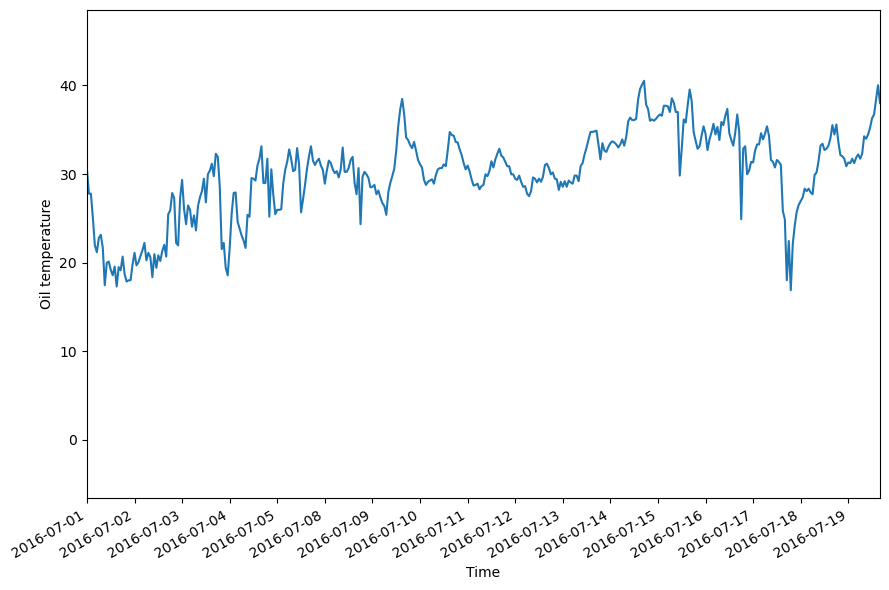

In [6]:
fig, ax = plt.subplots()

ax.plot(df['OT'])
ax.set_xlabel('Time')
ax.set_ylabel('Oil temperature')

plt.xticks(
    np.arange(0, 400, 24), 
    ['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04', '2016-07-05', '2016-07-08', '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16', '2016-07-17', '2016-07-18', '2016-07-19']
)

plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

2024-04-23 22:27:48.112905: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 22:27:48.278023: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 22:27:48.278285: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

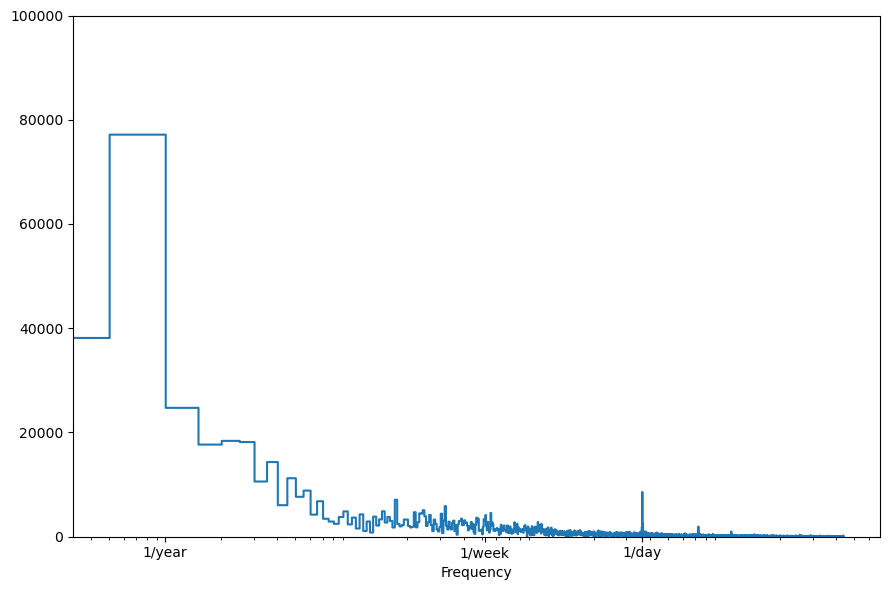

In [8]:
# Perform Fourier transform to identify seasonal periods
from tensorflow.signal import rfft # fast fourier transform

fft = rfft(df['OT'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['OT'])
hours_per_week = 24 * 7
hours_per_year = 24 * 365.2524
weeks_per_dataset = n_sample_h / hours_per_week
years_per_dataset = n_sample_h / hours_per_year

f_per_year = f_per_dataset / years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 52, 365.2524], ['1/year', '1/week', '1/day'])
plt.ylim(0, 100000)
plt.xlabel('Frequency')
plt.ylim(0,100000)
plt.tight_layout()
plt.show()

In [9]:
# Encode seasonal periods
import datetime

timestamp_s = pd.to_datetime(df['date']).map(datetime.datetime.timestamp)

day = 24*60*60
year = (365.2425)*day

df['day_sin'] = np.sin(timestamp_s * (2*np.pi / day))
df['day_cos'] = np.cos(timestamp_s * (2*np.pi / day))

df['year_sin'] = np.sin(timestamp_s * (2*np.pi / year))
df['year_cos'] = np.cos(timestamp_s * (2*np.pi / year))



In [10]:
df.head()

date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT  \
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000   
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001   
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001   
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001   
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000   

        day_sin   day_cos  year_sin  year_cos  
0 -5.000000e-01  0.866025  0.014787 -0.999891  
1 -2.588190e-01  0.965926  0.014070 -0.999901  
2 -4.877283e-12  1.000000  0.013353 -0.999911  
3  2.588190e-01  0.965926  0.012637 -0.999920  
4  5.000000e-01  0.866025  0.011920 -0.999929

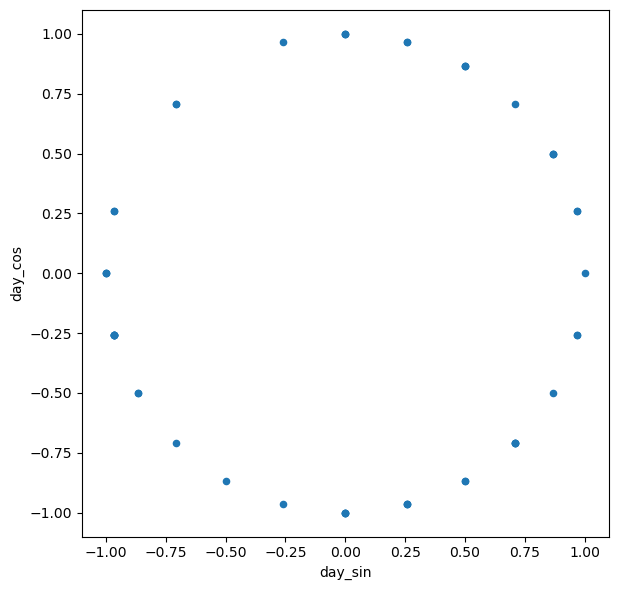

In [14]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

In [ ]:
# Create train/validation/test sets



In [ ]:
# Get the min and max values of the targets (to be used in future lessons)

MULL_max_train = np.max(train_df['MULL'])
MULL_min_train = np.min(train_df['MULL'])
MULL_max_test = np.max(test_df['MULL'])
MULL_min_test = np.min(test_df['MULL'])

OT_max_train = np.max(train_df['OT'])
OT_min_train = np.min(train_df['OT'])
OT_max_test = np.max(test_df['OT'])
OT_min_test = np.min(test_df['OT'])

print(MULL_max_train, MULL_min_train, MULL_max_test, MULL_min_test)
print(OT_max_train, OT_min_train, OT_max_test, OT_min_test)

In [ ]:
# Scale the data


In [ ]:
# Save as CSV files to be reused in future lessons

train_df.to_csv('data/train.csv', header=True, index=False)
val_df.to_csv('data/val.csv', header=True, index=False)
test_df.to_csv('data/test.csv', header=True, index=False)